## Final Project Submission

Please fill out:
* Student name:   Fridah Mumbi Njung'e
* Student pace:   Full time-Remote 
* Scheduled project review date/time: 
* Instructor name: Mr. William Okomba
* Blog post URL:

# Business Understanding

## Business Problem:

### The company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. 

## Goal:

### To determine which aircraft are the lowest risk for the company to start this new business endeavor. To translate findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

In [1]:
#import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Understanding

In [2]:
#load the dataset
#so research done shows the CSV file contains mixed data types, i tried encoding with UTF-8 and it refused...so tried latin one but notebook suggested i add low_memory=False
#worked after i did
df= pd.read_csv('AviationData.csv' , encoding = 'latin1', low_memory = False)

In [3]:
#so lets see the dataset
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
#data understanding
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [6]:
df.info() #shows the dataset’s size, completeness, and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [7]:
#during diabtes cleaning we used verbose=false, which after research shows the number of columns without actually printing the details of the columns
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Columns: 31 entries, Event.Id to Publication.Date
dtypes: float64(5), object(26)
memory usage: 21.0+ MB


so essentially it prints a summary of the dataframe, Number of entries (rows),Number of columns,memory usage,Data types of columns, as seen above

In [8]:
#so lets check the shape/dimensions of our df
df.shape

(88889, 31)

so our dataset has:
- 88889 rows
- 31 columns

In [9]:
#check for concise summary statistis...this is for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number.of.Engines,82805.0,1.146585,0.446510,0.0,1.0,1.0,1.0,8.0
Total.Fatal.Injuries,77488.0,0.647855,5.485960,0.0,0.0,0.0,0.0,349.0
Total.Serious.Injuries,76379.0,0.279881,1.544084,0.0,0.0,0.0,0.0,161.0
Total.Minor.Injuries,76956.0,0.357061,2.235625,0.0,0.0,0.0,0.0,380.0
Total.Uninjured,82977.0,5.325440,27.913634,0.0,0.0,1.0,2.0,699.0


In [10]:
#summary of categorical data. I first used include = all which wasn't very helpul so i decided to transpose it instead
df.describe(include='O').T

,count,unique,top,freq
Event.Id,88889,87951,20001212X19172,3
Investigation.Type,88889,2,Accident,85015
Accident.Number,88889,88863,CEN22LA149,2
Event.Date,88889,14782,1984-06-30,25
Location,88837,27758,"ANCHORAGE, AK",434
Country,88663,219,United States,82248
Latitude,34382,25589,332739N,19
Longitude,34373,27154,0112457W,24
Airport.Code,50132,10374,NONE,1488
Airport.Name,52704,24870,Private,240


In [11]:
#are there any duplicates in our df?
df.duplicated().sum()
print(f"There are {df.duplicated().sum()} duplicates in this dataset")

There are 0 duplicates in this dataset


In [12]:
#check for null values
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

so we notice most columns have null values and somehow will be difficult to fill most of them...eventually we'll have to drop them

# Data preparation and cleaning
## 1. Data cleaning

In [13]:
#Create a dataframe copy to be used in data cleaning using copy() method
df1 =df.copy(deep=True)
df1[:10]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,Personal,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982


In [14]:
#ok...lets check our columns
df1.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [15]:
#so we need all columns to be in same format, and replace all '.' with '_'. columns in lower case using comprehension
df1.columns = [name.strip().replace(".","_").lower() for name in df1.columns]
print(f"The new column names are: \n{df1.columns}")

The new column names are: 
Index(['event_id', 'investigation_type', 'accident_number', 'event_date',
       'location', 'country', 'latitude', 'longitude', 'airport_code',
       'airport_name', 'injury_severity', 'aircraft_damage',
       'aircraft_category', 'registration_number', 'make', 'model',
       'amateur_built', 'number_of_engines', 'engine_type', 'far_description',
       'schedule', 'purpose_of_flight', 'air_carrier', 'total_fatal_injuries',
       'total_serious_injuries', 'total_minor_injuries', 'total_uninjured',
       'weather_condition', 'broad_phase_of_flight', 'report_status',
       'publication_date'],
      dtype='object')


In [16]:
#i decided to drop columns with little or no importance to my dataset agenda
columns_drop = ['event_id', 'accident_number', 'latitude', 'longitude', 'airport_code', 'airport_name','registration_number', 'aircraft_category', 'far_description', 'schedule', 'air_carrier',
                'report_status', 'publication_date']
df1.drop(columns_drop, axis = 1,inplace=True)
print(f"There are {len(df1.columns)} columns remaining")

There are 18 columns remaining


In [17]:
#confirm what we have now
df1.columns

Index(['investigation_type', 'event_date', 'location', 'country',
       'injury_severity', 'aircraft_damage', 'make', 'model', 'amateur_built',
       'number_of_engines', 'engine_type', 'purpose_of_flight',
       'total_fatal_injuries', 'total_serious_injuries',
       'total_minor_injuries', 'total_uninjured', 'weather_condition',
       'broad_phase_of_flight'],
      dtype='object')

In [18]:
#check for unique values in each column
for coln in df1:
    coln_val = df1[coln].unique()
    print(f"{coln}\n{coln_val}\n")

investigation_type
['Accident' 'Incident']

event_date
['1948-10-24' '1962-07-19' '1974-08-30' ... '2022-12-22' '2022-12-26'
 '2022-12-29']

location
['MOOSE CREEK, ID' 'BRIDGEPORT, CA' 'Saltville, VA' ... 'San Manual, AZ'
 'Auburn Hills, MI' 'Brasnorte, ']

country
['United States' nan 'GULF OF MEXICO' 'Puerto Rico' 'ATLANTIC OCEAN'
 'HIGH ISLAND' 'Bahamas' 'MISSING' 'Pakistan' 'Angola' 'Germany'
 'Korea, Republic Of' 'Martinique' 'American Samoa' 'PACIFIC OCEAN'
 'Canada' 'Bolivia' 'Mexico' 'Dominica' 'Netherlands Antilles' 'Iceland'
 'Greece' 'Guam' 'Australia' 'CARIBBEAN SEA' 'West Indies' 'Japan'
 'Philippines' 'Venezuela' 'Bermuda' 'San Juan Islands' 'Colombia'
 'El Salvador' 'United Kingdom' 'British Virgin Islands' 'Netherlands'
 'Costa Rica' 'Mozambique' 'Jamaica' 'Panama' 'Guyana' 'Norway'
 'Hong Kong' 'Portugal' 'Malaysia' 'Turks And Caicos Islands'
 'Northern Mariana Islands' 'Dominican Republic' 'Suriname' 'Honduras'
 'Congo' 'Belize' 'Guatemala' 'Anguilla' 'France'
 'St V

In [19]:
df1

,investigation_type,event_date,location,country,injury_severity,aircraft_damage,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
2,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise
3,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
4,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,Accident,2022-12-26,"Annapolis, MD",United States,Minor,NaN,PIPER,PA-28-151,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN
88885,Accident,2022-12-26,"Hampton, NH",United States,NaN,NaN,BELLANCA,7ECA,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN
88886,Accident,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN
88887,Accident,2022-12-26,"Morgan, UT",United States,NaN,NaN,CESSNA,210N,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN


In [20]:
#so let's change the event date using date time
df1['event_date'] = pd.to_datetime(df1['event_date'])
df1['event_date']
#so extract the month and year too
df1['month'] = df1['event_date'].dt.month
df1['year'] = df1['event_date'].dt.year

In [21]:
#so i checked for null values in my new df with dropped columns..noticed there are also month and year cols so i went back and extracted those too to datetime
df1.isnull().sum()

investigation_type            0
event_date                    0
location                     52
country                     226
injury_severity            1000
aircraft_damage            3194
make                         63
model                        92
amateur_built               102
number_of_engines          6084
engine_type                7096
purpose_of_flight          6192
total_fatal_injuries      11401
total_serious_injuries    12510
total_minor_injuries      11933
total_uninjured            5912
weather_condition          4492
broad_phase_of_flight     27165
month                         0
year                          0
dtype: int64

In [22]:
#so still many nulls but we can fill some using mean mode etc
#first redo the statistics for the df1
df1.describe(include='O').T

,count,unique,top,freq
investigation_type,88889,2,Accident,85015
location,88837,27758,"ANCHORAGE, AK",434
country,88663,219,United States,82248
injury_severity,87889,109,Non-Fatal,67357
aircraft_damage,85695,4,Substantial,64148
make,88826,8237,Cessna,22227
model,88797,12318,152,2367
amateur_built,88787,2,No,80312
engine_type,81793,12,Reciprocating,69530
purpose_of_flight,82697,26,Personal,49448


In [23]:
df1.describe()

,event_date,number_of_engines,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,month,year
count,88889,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000,88889.000000,88889.000000
mean,1999-09-17 17:13:39.354475904,1.146585,0.647855,0.279881,0.357061,5.325440,6.591221,1999.206662
min,1948-10-24 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1948.000000
25%,1989-01-15 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1989.000000
50%,1998-07-18 00:00:00,1.000000,0.000000,0.000000,0.000000,1.000000,7.000000,1998.000000
75%,2009-07-01 00:00:00,1.000000,0.000000,0.000000,0.000000,2.000000,9.000000,2009.000000
max,2022-12-29 00:00:00,8.000000,349.000000,161.000000,380.000000,699.000000,12.000000,2022.000000
std,NaN,0.446510,5.485960,1.544084,2.235625,27.913634,3.062868,11.888226


In [24]:
df1.dtypes

investigation_type                object
event_date                datetime64[ns]
location                          object
country                           object
injury_severity                   object
aircraft_damage                   object
make                              object
model                             object
amateur_built                     object
number_of_engines                float64
engine_type                       object
purpose_of_flight                 object
total_fatal_injuries             float64
total_serious_injuries           float64
total_minor_injuries             float64
total_uninjured                  float64
weather_condition                 object
broad_phase_of_flight             object
month                              int32
year                               int32
dtype: object

In [25]:
#so i decided to fill numerical columns with median
#i researched how to get median values for all numerical columns at once using datatypes of the df1 and a for loop to fill them
num_cols = df1.select_dtypes(include=['float64', 'int32']).columns

for col in num_cols:
    median_val = df1[col].median()
    df1[col].fillna(median_val, inplace = True)


In [26]:
#for categorical columns....i filled them with unknown
#used the same method as above and filled all columns with object
cat_cols = df1.select_dtypes(include =['object']).columns

for col in cat_cols:
    df1[col].fillna('unknown', inplace=True)
    

In [27]:
#let's confirm null values again
df1.isnull().sum()

investigation_type        0
event_date                0
location                  0
country                   0
injury_severity           0
aircraft_damage           0
make                      0
model                     0
amateur_built             0
number_of_engines         0
engine_type               0
purpose_of_flight         0
total_fatal_injuries      0
total_serious_injuries    0
total_minor_injuries      0
total_uninjured           0
weather_condition         0
broad_phase_of_flight     0
month                     0
year                      0
dtype: int64

In [28]:
#so that worked....now we can check value counts before visualizing
for col in df1.columns:
    print(f"Value counts for column: {col}")
    print(df1[col].value_counts())
    print("\n")

Value counts for column: investigation_type
investigation_type
Accident    85015
Incident     3874
Name: count, dtype: int64


Value counts for column: event_date
event_date
1984-06-30    25
1982-05-16    25
2000-07-08    25
1983-08-05    24
1984-08-25    24
              ..
2014-03-16     1
2014-03-15     1
2014-03-12     1
2014-03-10     1
2022-12-29     1
Name: count, Length: 14782, dtype: int64


Value counts for column: location
location
ANCHORAGE, AK       434
MIAMI, FL           200
ALBUQUERQUE, NM     196
HOUSTON, TX         193
CHICAGO, IL         184
                   ... 
MALLARDS LDG, GA      1
LODGEPOLE, MT         1
VERNILLION, SD        1
MCMECHEN, WV          1
Brasnorte,            1
Name: count, Length: 27759, dtype: int64


Value counts for column: country
country
United States                       82248
Brazil                                374
Canada                                359
Mexico                                358
United Kingdom                       

# Data Visualization
## Objectives
### 1. Check if there's a correlation between the number of injuries and specific weather conditions?
### 2. How do the number of accidents/injuries vary by country?
### 3. What is the total number of accidents recorded over a specific period?
### 4. Do certain types of flights/make of aircraft contribute in a higher incidence of injuries?
### 5. Is there a relationship between the extent of aircraft damage and the type of engine involved in an accident?
### 6. How do different weather conditions influence the extent of aircraft damage during an incident?
### 7. Analyze how make, weather, and flight phase together influence accident rates.

# Univariate analysis
### Check distribution for individual features in the dataset

## 1. injury severity

In [29]:
#check value-counts
df1['injury_severity'].value_counts()

injury_severity
Non-Fatal     67357
Fatal(1)       6167
Fatal          5262
Fatal(2)       3711
Incident       2219
              ...  
Fatal(80)         1
Fatal(217)        1
Fatal(169)        1
Fatal(88)         1
Fatal(189)        1
Name: count, Length: 110, dtype: int64

In [30]:
#many different fatals...so we need to standardize them
df1['injury_severity'] = df1['injury_severity'].str.strip()
#df1['injury_severity']

#then standadize fatal() to just 'Fatal'
df1['injury_severity']=df1['injury_severity'].str.replace(r'Fatal\(\d+\)', 'Fatal', regex=True)
print("the unique values in 'injury_severity':\n", df1['injury_severity'].unique())

#that worked...so now we can check value counts of new standardized column
df1['injury_severity'].value_counts()

the unique values in 'injury_severity':
 ['Fatal' 'Non-Fatal' 'Incident' 'Unavailable' 'unknown' 'Minor' 'Serious']


injury_severity
Non-Fatal      67357
Fatal          17826
Incident        2219
unknown         1000
Minor            218
Serious          173
Unavailable       96
Name: count, dtype: int64

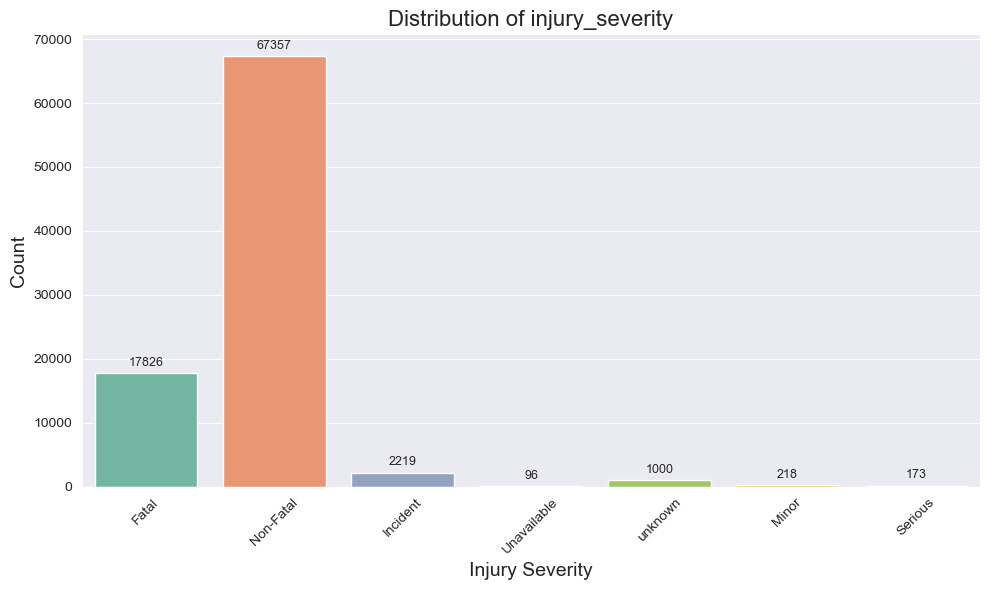

In [31]:
#now we can plot!!!
plt.figure(figsize=(10, 6))  

sns.set_style('darkgrid')
ax= sns.countplot(data=df1, x='injury_severity', palette='Set2')
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=9)
    
#add labels and titles
plt.title('Distribution of injury_severity', fontsize=16)
plt.xlabel('Injury Severity', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)  
plt.tight_layout()      
plt.show()

## Observation
#### -So this shows that 'non fatal' injuries are the most common, followed by 'fatal'injuries.
#### -Other categories like 'minor','serious','unavailable' are less common.

## Conclusion
#### - Data shows that vast majority of incidences are non-fatal. 
#### - However, there's a significant number of fatal injuries, showing a critical area of focus for aviation safety.

## Recommendation
#### - Prioritize fatal incidences to identify the root causes and implement preventive measures to save lives
#### - While non fatal incidences don't result in deaths, they could reveal underlying safety issues of planes, operational deficiencies or equipment failure

## 2. Aircraft damage

In [32]:
#value counts
df1['aircraft_damage'].value_counts()

aircraft_damage
Substantial    64148
Destroyed      18623
unknown         3194
Minor           2805
Unknown          119
Name: count, dtype: int64

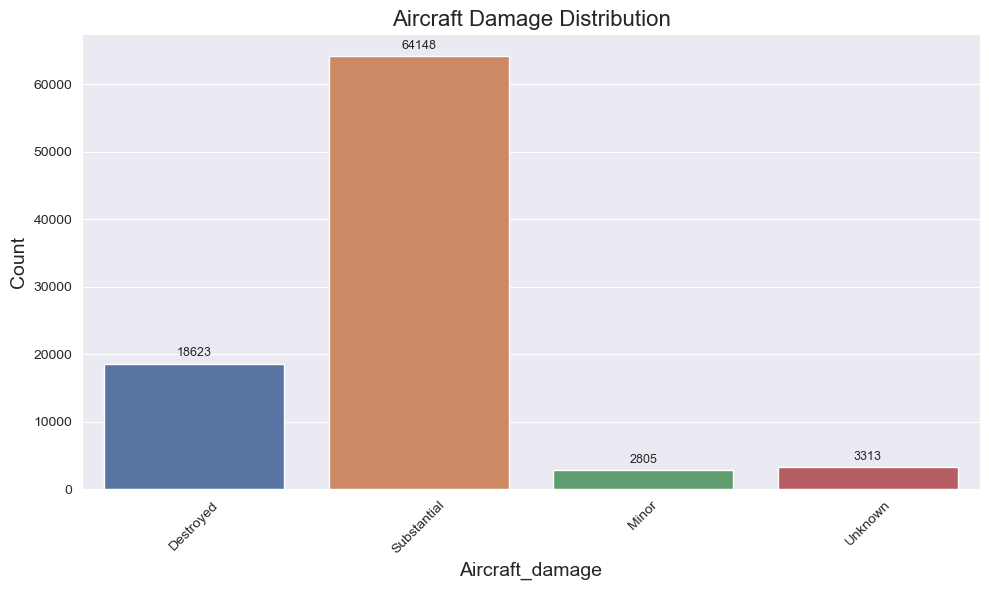

In [33]:
# lets replace unknown with Unknown..or just capitalize instead
df1['aircraft_damage']= df1['aircraft_damage'].str.capitalize()

#plot
plt.figure(figsize=(10, 6))  

sns.set_style('darkgrid')
ax=sns.countplot(data=df1, x='aircraft_damage', palette='deep')
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=9)

#add labels and titles
plt.title('Aircraft Damage Distribution', fontsize=16)
plt.xlabel('Aircraft_damage', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()

## Observation
#### - So this shows majority of incidents result in 'Substantial' damages. 
#### - 'Destroyed' is the 2nd most common and 'Unknown' is least common.

## Conclusion
#### -Shows that most prevalent type of aircraft incidences involves substantial damage.
#### -A significant number has been categorized as destroyed, though less frequent, could mean more fatalities

## Recommendation
#### -Prioritize substantial damage analysis: causes, circumstances leading to the damage. It will help with improvements in aviation safety
#### - Investigate Destroyed categories, since it indicates severe accidents with potentially more fatalities.It will aid in preventing future catastrophic events
#### - Minor and unknown categories should also be investigated to ensure data accuracy for safety analysis.

## 3. Number of Engines

In [34]:
# so lets see how these are
df1['number_of_engines'].value_counts()

number_of_engines
1.0    75666
2.0    11079
0.0     1226
3.0      483
4.0      431
8.0        3
6.0        1
Name: count, dtype: int64

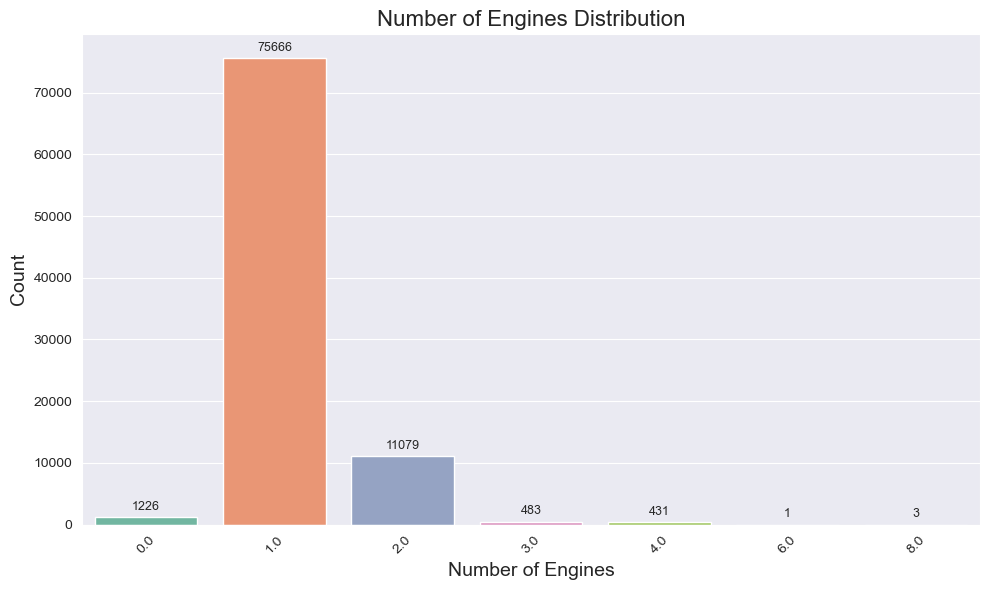

In [35]:
#plotting
plt.figure(figsize=(10, 6))  

sns.set_style('darkgrid')
ax=sns.countplot(data=df1, x='number_of_engines', palette='Set2')
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=9)

#add labels and titles
plt.title('Number of Engines Distribution', fontsize=16)
plt.xlabel('Number of Engines', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()

## Observation
#### - Most air crafts have 1 engine, followed by planes with 2 engines
#### - Planes with 0 engines are significantly higher than those with 3,4,6,and 8 engines which appear to have least planes

## Conclusion
#### - Research shows that planes with 0 engines are probably drones and gliders. could also mean that there was an anormaly in data recording for unpowered aircrafts
#### -Planes with 6 or 8 engines are extremely rare. Those with 4 engines are typical for larger commercial airliners and cargo planes

## Recommendation
#### - Focus on planes with 1 or 2 engines, since they are the majority. So any resource allocation,maintenance planning,pilot training or operational considerations should be based on them
#### - Confirm whether planes with 0 engines are indeed unpowered, or if this represents missing data

## 4. Amateur Built

In [36]:
df1['amateur_built'].value_counts()

amateur_built
No         80312
Yes         8475
unknown      102
Name: count, dtype: int64

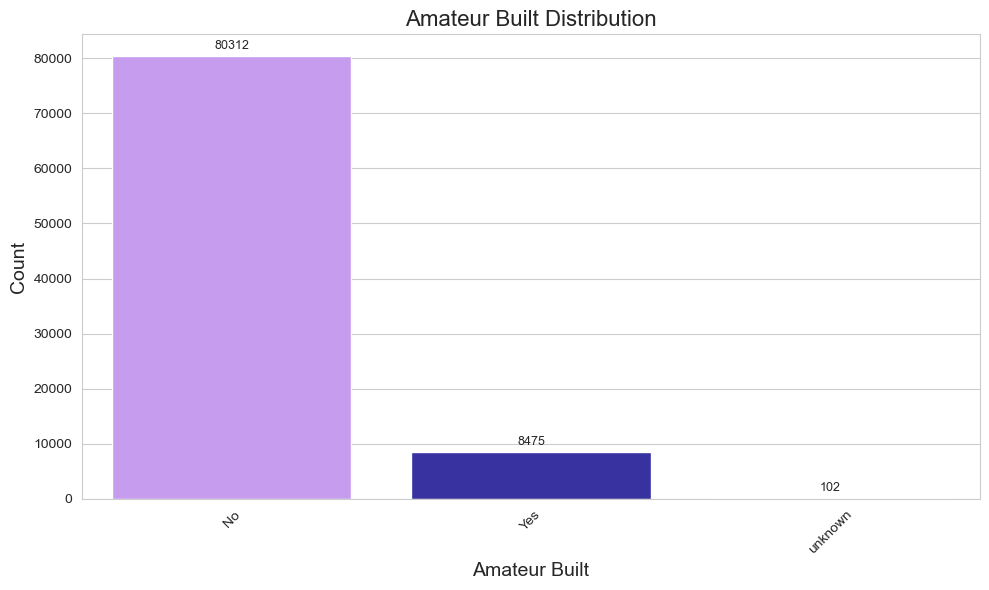

In [37]:
#plotting to see
plt.figure(figsize=(10, 6))  

sns.set_style('whitegrid')
ax=sns.countplot(data=df1, x='amateur_built', palette=['#C68EFD','#261FB3','#F75A5A'])
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=9)

#add labels and titles
plt.title('Amateur Built Distribution', fontsize=16)
plt.xlabel('Amateur Built', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()

## Observation
#### - Shows that majority of the planes are not amateur built
#### - Very few are amateur built(8475 entries) and less than 110 unknown values

## Conclusion
#### - Shows that majority of the planes are professionally manufactured and have passed all FAA regulations.
#### - A smaller but still significant number shows that some planes are home-built/Amateur built and haven't passd regulations. A very small number has unknown built status

## Recommendation
#### - Focus resources more on non-amateur built planes
#### - Ensure amateur built planes are still assessed and pass all regulations before use
#### - Clarify unknown built status planes to improve data integrity to enable for accurate safety analysis

# Bivariate analysis



## 1. Check if there's a correlation between the number of injuries and specific weather conditions

In [38]:
df1['weather_condition'].value_counts()

weather_condition
VMC        77303
IMC         5976
unknown     4492
UNK          856
Unk          262
Name: count, dtype: int64

### -So i first did some further research to tell me what the initials in the counts mean
#### 1.VMC (Visual Meteorological Conditions)
##### -Weather conditions that allow pilots to fly primarily by visual reference to the ground and horizon.
#### 2.IMC (Instrument Meteorological Conditions)
##### - Weather conditions requiring pilots to rely on aircraft instruments for navigation and control due to poor visibility or cloud obstruction.
#### 3.UNK(Unknown)
##### - Weather conditions were not reported, recorded, or available for the incident.

In [39]:
#standardize the column since unk and UNK plus unknown are the same
#striped white space then replaced columns
df1['weather_condition'] = df1['weather_condition'].str.strip()
df1['weather_condition'] = df1['weather_condition'].replace({'unknown': 'UNK', 'Unk': 'UNK'})


In [40]:
#value counts to confirm
df1['weather_condition'].value_counts()

weather_condition
VMC    77303
IMC     5976
UNK     5610
Name: count, dtype: int64

### now we can merge and plot compare the two variables

In [41]:
#i merged and realized unavailable and unknown in injury severity are essentially the same...so i could replace/merge them
df1['injury_severity'] = df1['injury_severity'].str.lower().str.strip()
df1['injury_severity']=df1['injury_severity'].replace({'unavailable':'unknown','minor':'non-fatal','serious':'non-fatal','incident':'non-fatal'})
print(df1['injury_severity'].value_counts())

injury_severity
non-fatal    69967
fatal        17826
unknown       1096
Name: count, dtype: int64


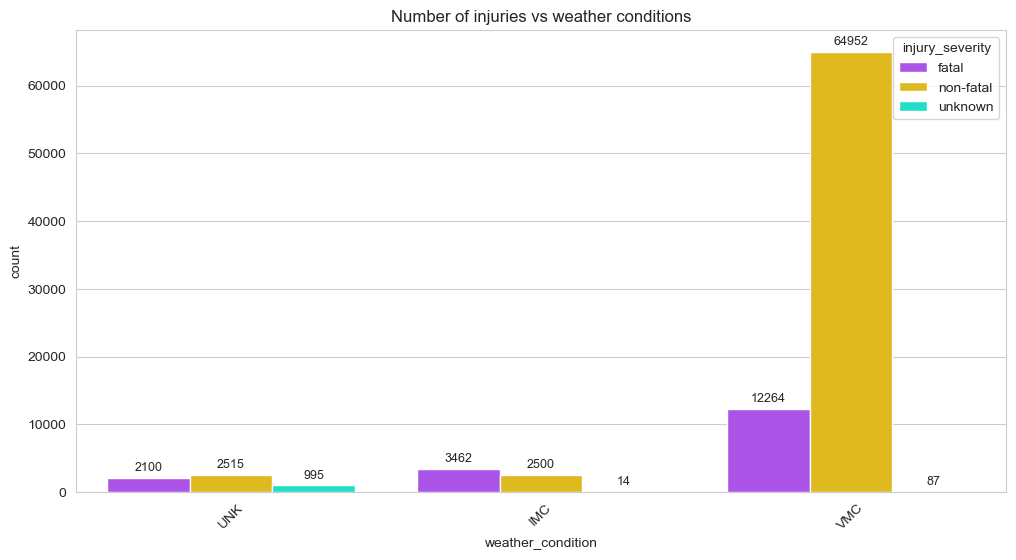

In [42]:
#plot them
plt.figure(figsize=(12,6))
ax= sns.countplot(data= df1,x= 'weather_condition',hue = 'injury_severity', palette= ['#B13BFF','#FFCC00','#00FFDE','#EA2F14','#090040'])
plt.xticks(rotation=45)
plt.title('Number of injuries vs weather conditions')
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=9)
plt.show()

## Observation
#### - So this essentially shows that most injuries(both fatal and non fatal) occur when weather conditions are visual meteorological conditions(VMC). meaning more accidents happen during good visual weather rather than in bad weather conditions

## Conclusion
#### - Data clearly shows that majority of incidents, particularly those resulting in both fatal and non fatal injuries occur in VMC.This shows that even in seemingly good weather conditions, a large number of injuries occur as compared to unknown/bad conditions(IMC).
#### - Unknown weather conditions also contribute to significant injuries, including fatalies

## Recommendations
#### - Investigate VMC thoroughly and lean on contributing factors for the incidences e.g pilot errors, mid air collisions, system failures etc
#### -Analyze challenges that could lead to IMC fatalities, such as loss of control in instrument conditions,controlled flight into terrain, system failures and pilot proficiency in instrument flights

## 2. How do the number of accidents/injuries vary by country?¶

In [43]:
#countries value counts
df1['country'].value_counts()[:10]

country
United States     82248
Brazil              374
Canada              359
Mexico              358
United Kingdom      344
Australia           300
France              236
Spain               226
unknown             226
Bahamas             216
Name: count, dtype: int64

In [44]:
#unique values?
len(df1['country'].unique())

220

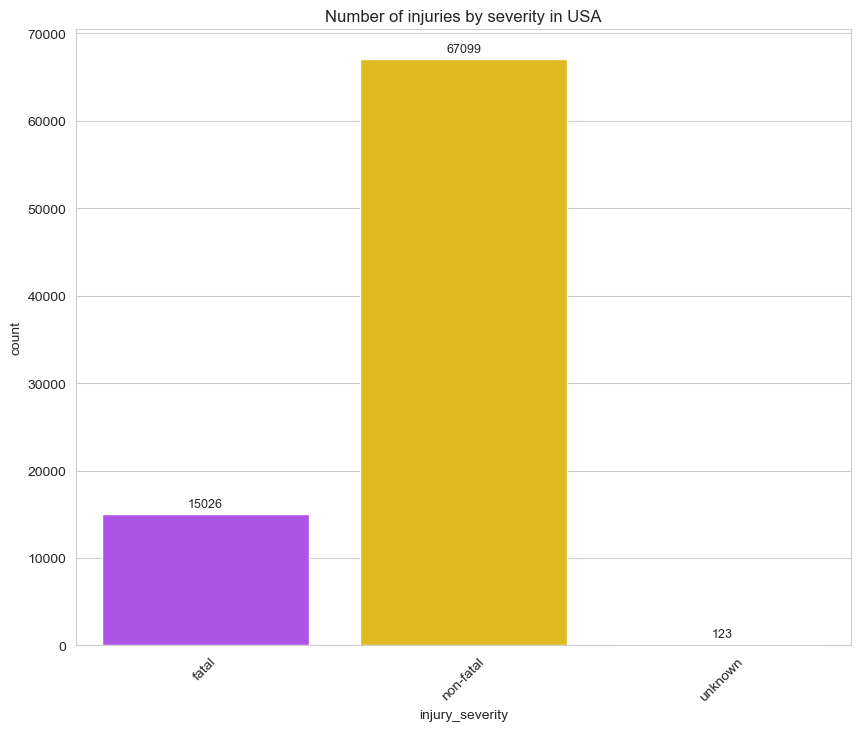

In [45]:
#since there are no duplicates and USA has the most number of entries...we can compair with that
# I tried plotting top 10 countries but the rest of the values were so negligible, thats why i picked USA
df_USA = df1[df1['country'] == 'United States']

#Plot using bar graph

plt.figure(figsize=(10,8))
ax= sns.countplot(data=df_USA, x='injury_severity', palette=['#B13BFF','#FFCC00','#00FFDE','#EA2F14','#090040'])
plt.xticks(rotation=45)
plt.title('Number of injuries by severity in USA')
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=9)
plt.show()

## Observations
#### - It shows that still 'non fatal' injuries are the most common, followed by 'fatal' injuries
#### - very few incidents noted and almost if not negligible values on unknown and fatal

## Conclusion
#### - In USA, most aircraft incidences result in non fatal injuries, however a significant number of incidences are fatal, showing a critical area in aviation safety.

## Recommendation
#### - Focus on fatal injuries despite being lower than non fatal injuries, to prioritize on safety policy development.
#### - Analyze non fatal injuries to identify common patterns leading to the same, to prevemt leading to more severe outcomes
#### - Minimize unknown status to ensure accurate data collection and minimize ant missing information

## 3. What is the total number of accidents recorded over a specific period?

In [46]:
#First lets see the dates 
df1['event_date'].value_counts()

event_date
1984-06-30    25
1982-05-16    25
2000-07-08    25
1983-08-05    24
1984-08-25    24
              ..
2014-03-16     1
2014-03-15     1
2014-03-12     1
2014-03-10     1
2022-12-29     1
Name: count, Length: 14782, dtype: int64

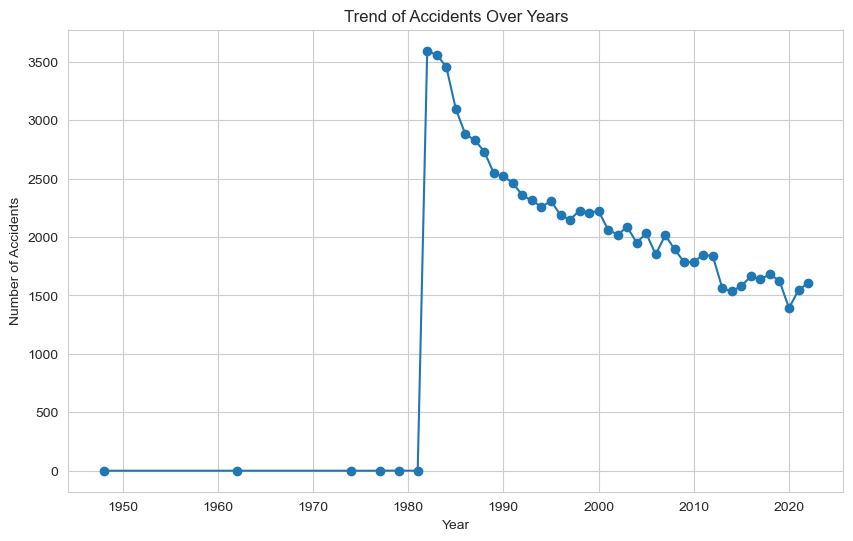

In [47]:
#we had already converted the dates to datetime above.. so i figured i could group the accidents occurences by year before plotting
#i had tried plotting without .count...gave me multiple line graphs over different years...almost gave up but did more research and came to using either count or .size
#count works better since it automatically gets the number of accidents recorded from rows in every year...i did a little dance here
accidents_per_year = df1.groupby(df1['event_date'].dt.year)['event_date'].count()
accidents_per_year

#plot using line graph to clearly show the trends over the years

plt.figure(figsize=(10,6))
accidents_per_year.plot(marker='o')
plt.title('Trend of Accidents Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show();

## Observations
#### - The line graph shows that between 1950- early 80's, the number of accidents is basically at a 0. so either there were very few accidents or there were no records done for the accidents
#### - There is a sudden increase in the number of accidents in early 80's around 1982 or 1983(probably because of the previous years being at 0)
#### - Number of accidents then shows a down ward trend after hitting it's peak in 80's, and shows a gradual decline till present time in the dataset.This could mean either better records done, or improvement in aviation safety over time

## Conclusions
#### - Shows a strong downward trend in the number of aviation accidents since the mid 80's, indicating significant improvements in aviation safety
#### - The initial period of near zero suggests potential data incompleteness for earlier years

## Recommendations
#### - Confirm if the near zero accidents before early 80's are accurate or simply missing.
#### - Confirm continued safety improvements that have led to decline in accidents e.g technological advancements, improved training, better air traffic control etc


## 4. Do certain types of flights/make of aircraft contribute in a higher incidence of injuries?

In [48]:
df1['make'].value_counts()[:15]

make
Cessna       22227
Piper        12029
CESSNA        4922
Beech         4330
PIPER         2841
Bell          2134
Boeing        1594
BOEING        1151
Grumman       1094
Mooney        1092
BEECH         1042
Robinson       946
Bellanca       886
Hughes         795
Schweizer      629
Name: count, dtype: int64

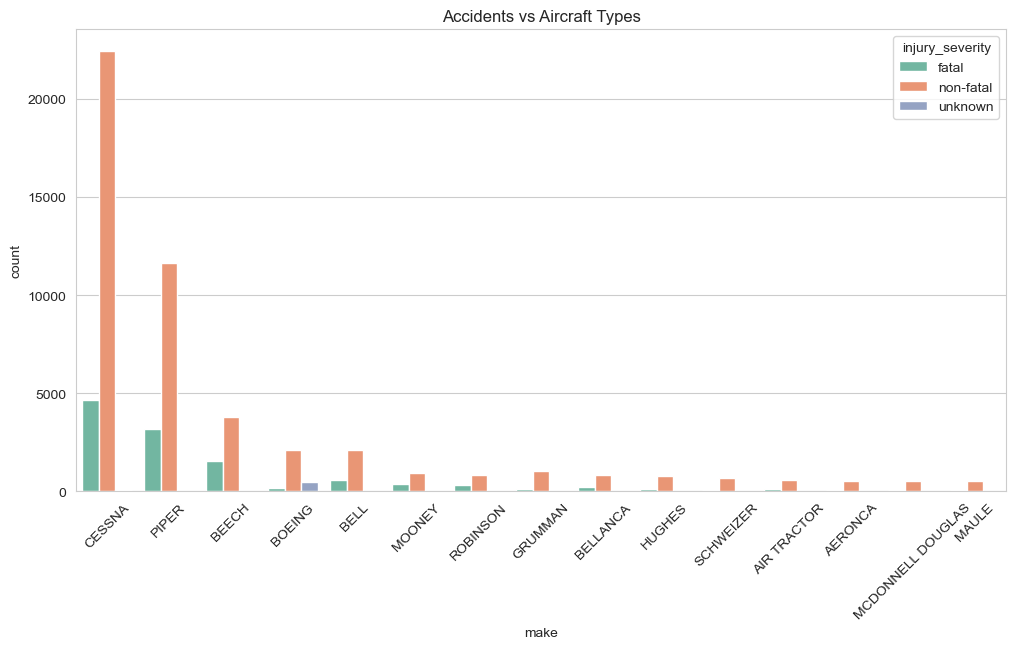

In [49]:
#ok, so 2 different Cessna's....standardization again!!!!
df1['make'] = df1['make'].str.upper()
make_15 = df1['make'].value_counts().nlargest(15).index

plt.figure(figsize = (12,6))
sns.countplot(data = df1, x = 'make',order = make_15, hue = 'injury_severity',palette = 'Set2')
plt.xticks(rotation= 45)
plt.title('Accidents vs Aircraft Types')

plt.show()

## Observations
#### - Bar chart shows top 15 aicraft models with the highest number of injuries, with CESSNA showing highest number of injuries('non-fatal'), being over 20,000 counts
#### - 'PIPER' is the second highest in number of injuries.with 'non fatal' injuries as the common outcome. could be because of overuse?we'll see their engines maybe later.
#### - incidental, serious and unknown injuries are rare accross the whole graph

## Conclusion
#### - Shows that CESSNA,PIPER AND BEECH aircraft are involved in majority of accidents, likely due to their high prevalence in general aviation
#### - BOEING, shows a significantly lower number of accidents, despite being a major manufacturer. This reflects different operational environments and fleet sizes

## Recommendations
#### - Despite CESSNA,PIPER and BEECH having majority injuries, we should normalize accident counts by exposure i.e number of aircrafts in operations, total flight hours, total depatures
#### - Investigate whether said companied have other areas of concern that could increase their accidents(pilot training, aircraft system maintenance,weather conditions etc)

## 5. Is there a relationship between the extent of aircraft damage and the type of engine involved in an accident?

In [50]:
#ok...lets see the engines of these crafts
df1['engine_type'].unique()

array(['Reciprocating', 'unknown', 'Turbo Fan', 'Turbo Shaft', 'Unknown',
       'Turbo Prop', 'Turbo Jet', 'Electric', 'Hybrid Rocket',
       'Geared Turbofan', 'LR', 'NONE', 'UNK'], dtype=object)

In [51]:
#at this point...i wanna die!!!!...standardizing these columns is actually frustrating, but oh well!
df1['engine_type']= df1['engine_type'].str.capitalize()
df1['engine_type']=df1['engine_type'].replace('Unk','Unknown')
print("Unique engine types are:", df1['engine_type'].unique())
df1['engine_type'].value_counts()

Unique engine types are: ['Reciprocating' 'Unknown' 'Turbo fan' 'Turbo shaft' 'Turbo prop'
 'Turbo jet' 'Electric' 'Hybrid rocket' 'Geared turbofan' 'Lr' 'None']


engine_type
Reciprocating      69530
Unknown             9148
Turbo shaft         3609
Turbo prop          3391
Turbo fan           2481
Turbo jet            703
Geared turbofan       12
Electric              10
Lr                     2
None                   2
Hybrid rocket          1
Name: count, dtype: int64

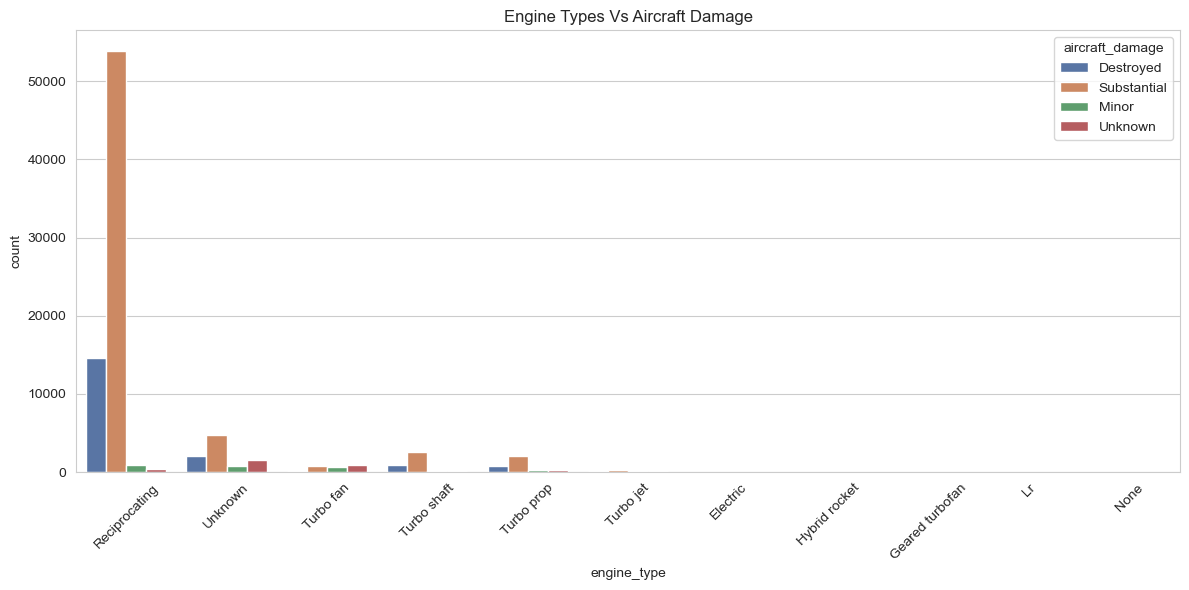

In [52]:
#so let's plot
plt.figure(figsize=(12,6))
sns.countplot(data= df1,x= df1['engine_type'],hue = 'aircraft_damage', palette='deep')
plt.xticks(rotation=45)
plt.title('Engine Types Vs Aircraft Damage')
plt.tight_layout()
plt.show()


## Observations
#### - 'Reciprocating' types of engines are clearly disadavantaged since they have the highest number of incidents that result in 'substantial' aircraft damage. also with the highest number of 'destroyed' damages
#### - turbine based engines('Turbo Fan','Turbo Shaft','Turbo Prop' and 'turbo jet) are involved in fewer incidents that result in aircraft damage
#### - less common engines types(electric,hybrid rocket, geared turbofan, lr, etc) have minimal or no damage at all

## Conclusion
#### - Data strongly indicates that majority of accidents involving damage occur in Reciprocating engines
#### - Modern or less common engine types like electric, hybri rocket and geared turbofans have almost no recorded damage history either due to limited numbers or newer operational safety standards

## Recommendation
#### - Focus on Reciprocating engines and figure out causes leading to increased accidents
#### - Monitor emerging engine technologies to prevent severe outcomes in future
#### - Normalize accident counts with fleet hours, depatures for each engine type

## 6. How do different weather conditions influence the extent of aircraft damage during an incident?

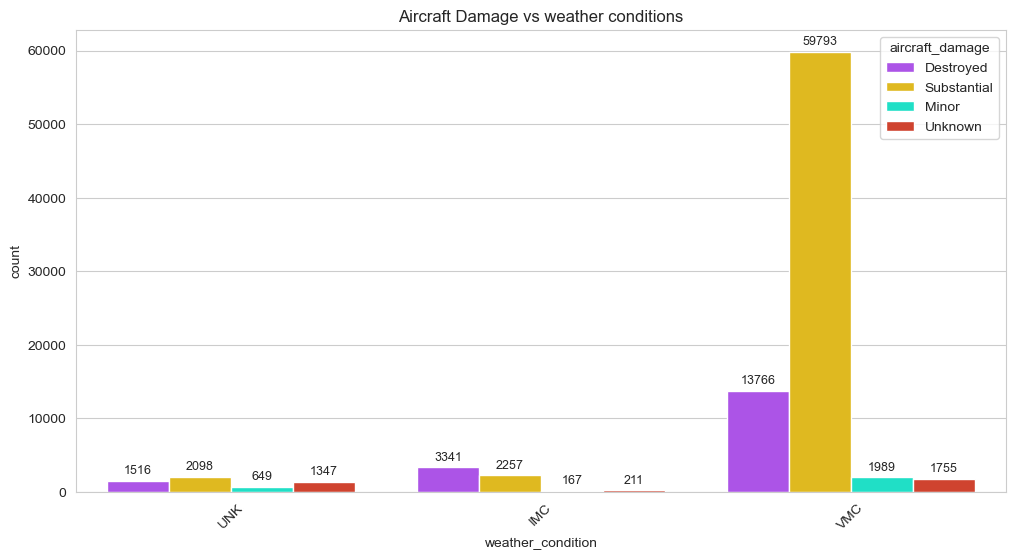

In [53]:
#this should be relatively easier now...i hope
plt.figure(figsize=(12,6))
ax = sns.countplot(data= df1,x= 'weather_condition',hue = 'aircraft_damage', palette= ['#B13BFF','#FFCC00','#00FFDE','#EA2F14','#090040'])
plt.xticks(rotation=45)
plt.title('Aircraft Damage vs weather conditions')
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=9)
plt.show()

## Observation
#### - Most aircraft damage is occuring in VMC. This shows that despite good weather conditions and visibility,a large number of incidents leading to substantial air damage still happens
#### - Second highest damage to planes is 'Destroyed', after 'Substantial',regardless of weather conditions
#### - Fewer aircraft damage incidents occur in IMC or UNK as compared to VMC

## Conclusion
#### - Shows that majority of aircraft damage incidents, especially substantial and destroyed aircrafts occur in VMC
#### - IMC has a high number of destroyed aircrafts, but not as high as VMC. 
#### - There's also a significant number of incidents where weather conditions are unknown

## Recommendation
#### - Investigate underlying causes in VMC(to include: Pilot errors, mid air collisions, mechanical failures etc)
#### - Analyze IMC damages and challenges faced eg. loss of control due to instrument disorientation, controlled flight into terrain in low visibility, system failures etc
#### - Cross reference both VMC and IMC with pilot experience, ratings and flight hours

## 7. How do the number of engines in planes affect injuries?

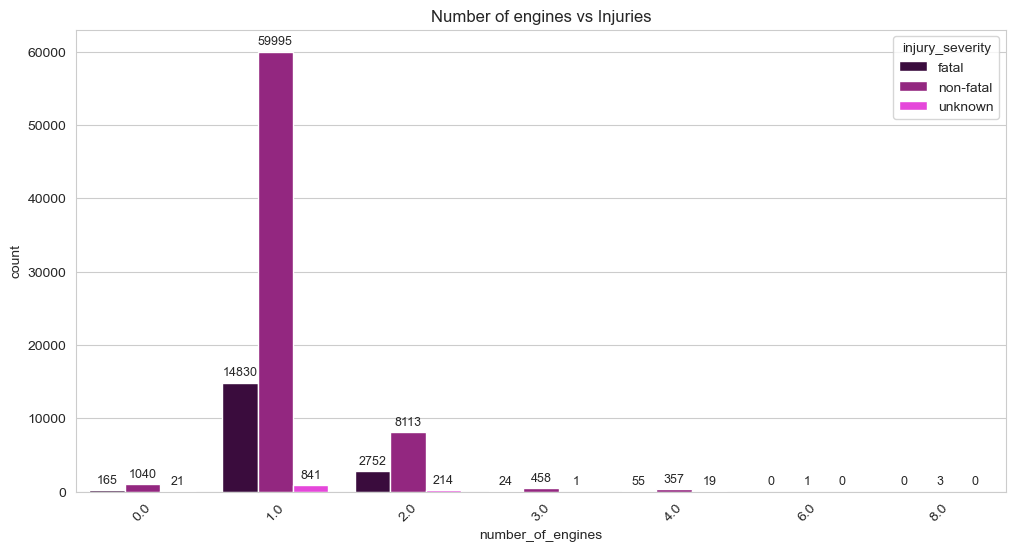

In [54]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data= df1,x= 'number_of_engines',hue = 'injury_severity', palette= ['#410445','#A5158C','#FF2DF1','#F6DC43'])
plt.xticks(rotation=45)
plt.title('Number of engines vs Injuries')
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=9)
plt.show()

## Observation and Conclusion
#### - Aircrafts with 1 engine are associated with the highest number of injuries
#### - Aircrafts with 2 engines come in 2nd but those with 0 engines also show a significant number of injuries
#### - Those with 3 or more engines have the least number of injuries

## Recommendation
#### -Prioritize single engine planes since they have highest number of injuries,both fatal and non fatal, and focus on causes leading to the same.
#### -Investigate risks associated with 2 engine planes despite their numbers being lower
#### - Investigate 0 engine planes(e.g gliders and drones) and causes of their injuries, are they due to operational risks(weather, terrain, aerobatics etc)


# Multivariate Analysis

## 1.Analyze how make, weather, and flight phase together influence accident rates.

In [55]:
#so this made me a bit depressed...literally...but after research and digging and sleepless nights....lets finish this...Finally!!!
# we already have details on weather conditions,make and incidences...so let's check flight phase
df1['broad_phase_of_flight'].value_counts()

broad_phase_of_flight
unknown        27165
Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: count, dtype: int64

In [56]:
#standardize
df1['broad_phase_of_flight']= df1['broad_phase_of_flight'].str.capitalize()
df1['broad_phase_of_flight']=df1['broad_phase_of_flight'].replace('Unknown','Other')
print("Unique broad phase of flights are:", df1['broad_phase_of_flight'].unique())


Unique broad phase of flights are: ['Cruise' 'Other' 'Approach' 'Climb' 'Takeoff' 'Landing' 'Taxi' 'Descent'
 'Maneuvering' 'Standing' 'Go-around']


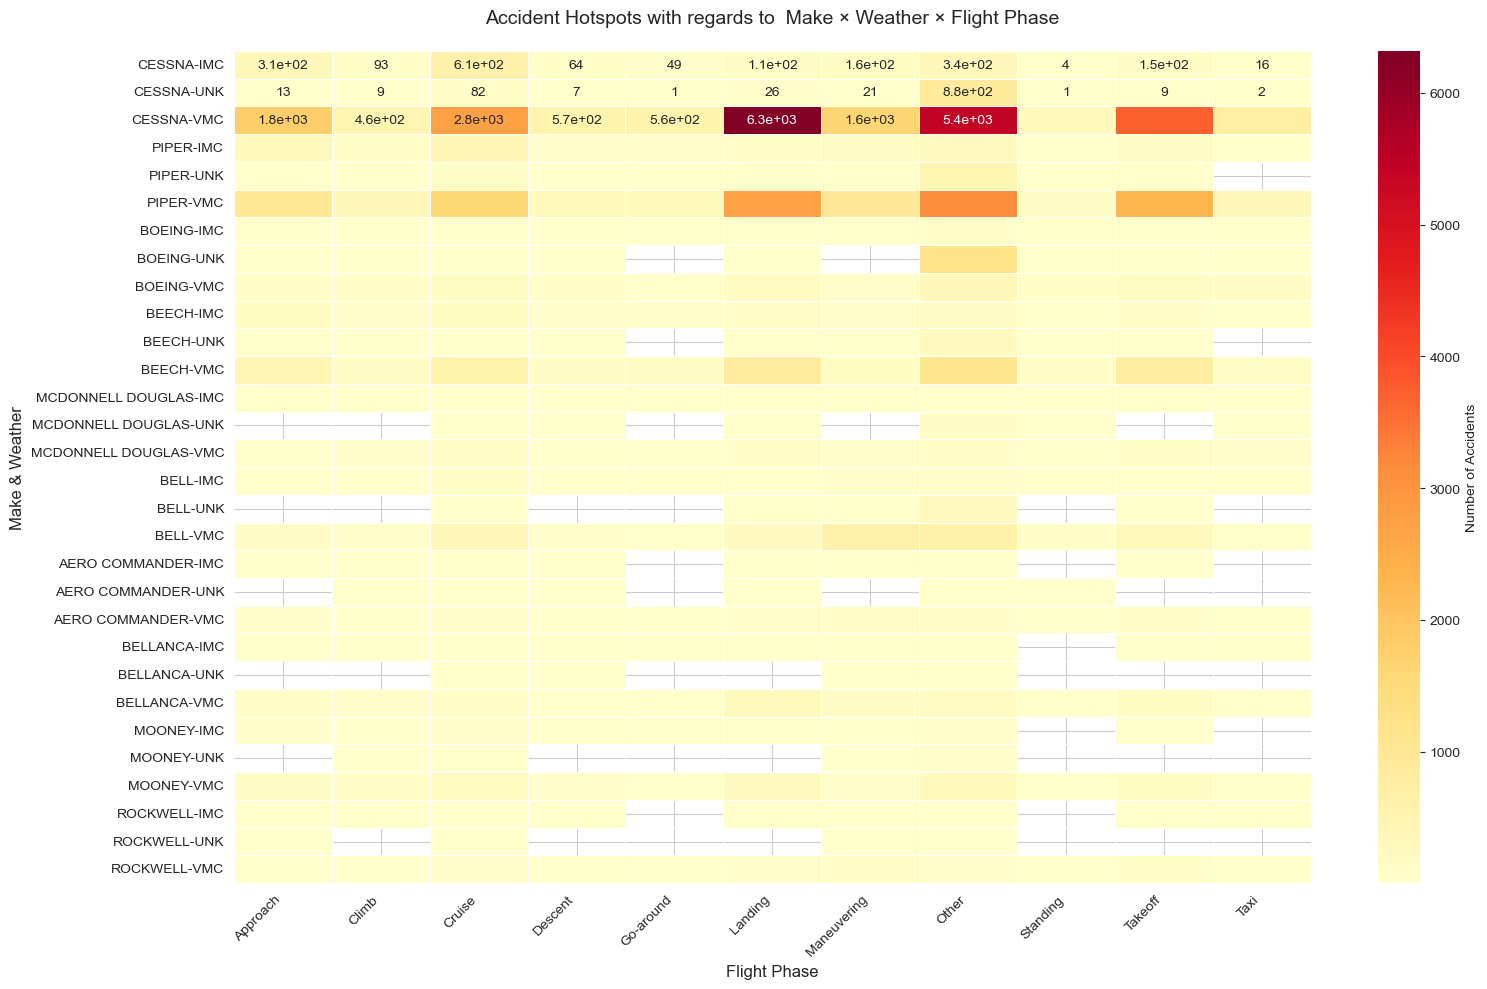

In [57]:
#First attempt grouping them to see if heatmap will work...please work!!
accident_counts_by_factors = df1.groupby(['make', 'weather_condition', 'broad_phase_of_flight']).size().reset_index(name='accident_count')

# pivot table next
heatmap_data = accident_counts_by_factors.pivot_table(index=['make', 'weather_condition'],columns='broad_phase_of_flight',values='accident_count')


#OK...lets try plotting with at least top 15 entries as integers
top_makes = accident_counts_by_factors['make'].value_counts().nlargest(10).index
heatmap_data = heatmap_data.loc[top_makes]
accident_counts_by_factors['accident_count'] = accident_counts_by_factors['accident_count'].astype(int)

#then plot                                                                                                   
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data,annot=True,cmap='YlOrRd',linewidths=0.5,cbar_kws={'label': 'Number of Accidents'})

#titles
plt.title('Accident Hotspots with regards to  Make × Weather × Flight Phase', pad=20, fontsize=14)
plt.xlabel('Flight Phase', fontsize=12)
plt.ylabel('Make & Weather', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Observations
#### * Dominance of Cessna and Piper: Consistent with previous observations, "CESSNA" and "PIPER" aircraft appear to be involved in the highest number of accidents across various weather conditions and flight phases.
#### * VMC Dominance: For Cessna and Piper, "VMC" (Visual Meteorological Conditions) combinations show the most prominent "hotspots" (darker cells).
#### * Significant "Unknown" Weather: "UNK" (Unknown weather conditions) for Cessna and Piper also shows considerable accident counts across various flight phases, highlighting a data reporting gap that affects accident analysis.
#### * IMC Accidents: While fewer than VMC, IMC conditions still contribute to accidents. For Cessna and Piper, IMC incidents show up across phases like "Landing" and "Maneuvering," though with lower counts than their VMC counterparts.
#### * Boeing and Other Large Aircraft: "BOEING" (both upper and lower case) shows very few accidents across all weather conditions and flight phases, reinforcing the idea of high commercial aviation safety rates (though, again, without normalization, this is just absolute count).
#### * "Maneuvering" and "Landing/Takeoff" as Critical Phases: Across Cessna and Piper, "Maneuvering," "Landing," and "Takeoff" consistently show the highest accident counts, regardless of weather, indicating these are inherently high-risk flight phases for these types of aircraft.

## Conclusion
#### -This heatmap clearly identifies Cessna and Piper aircraft operating in Visual Meteorological Conditions (VMC) during the Maneuvering, Landing, and Takeoff phases as the primary "hotspots" for accidents in this dataset.
#### -While "Unknown" weather conditions also account for a substantial number of accidents, particularly for these manufacturers, the absolute highest counts are in VMC. 
#### -The significantly lower accident counts for commercial aircraft manufacturers like Boeing suggest a stark difference in risk profile, likely due to fleet size, operational environment, and regulatory oversight. 

## Recommendation
#### *Focus investigative efforts on accidents involving Cessna and Piper aircraft in VMC, particularly during maneuvering, landing, and takeoff. Analyze the specific types of errors, environmental factors, or mechanical issues prevalent in these high-volume scenarios.
#### * Maneuvering:Investigate pilot training, decision-making, and specific maneuvers.
#### * Landing/Takeoff: Common phases for loss of control, runway excursions, or hard landings. Focus on short-field operations, crosswind techniques, and aircraft performance limits.
#### * Prioritize efforts to reduce incidents with "Unknown" weather conditions and "Unknown" flight phases. This missing information hinders precise accident analysis.
#### *Based on the normalized data, develop targeted safety programs, pilot training modules, and regulatory advisories specifically for general aviation pilots operating Cessna and Piper aircraft, with particular emphasis on high-risk phases like maneuvering, takeoff, and landing.
#### * Analyze Rare Categories: While lower in count, consider if any rare combinations (e.g., specific makes in IMC, or unique flight phases) represent unusually high rates once normalized, indicating specific niche risks.


In [58]:
# Let's convert our df copy to main df to enable editing in tableaue
df = df1.copy()

#confirm its changed
df.head()

,investigation_type,event_date,location,country,injury_severity,aircraft_damage,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,month,year
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,fatal,Destroyed,STINSON,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,10,1948
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,fatal,Destroyed,PIPER,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Other,7,1962
2,Accident,1974-08-30,"Saltville, VA",United States,fatal,Destroyed,CESSNA,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,Cruise,8,1974
3,Accident,1977-06-19,"EUREKA, CA",United States,fatal,Destroyed,ROCKWELL,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,6,1977
4,Accident,1979-08-02,"Canton, OH",United States,fatal,Destroyed,CESSNA,501,No,1.0,Unknown,Personal,1.0,2.0,0.0,0.0,VMC,Approach,8,1979


In [59]:
#close and convert to csv
df.to_csv("Aviation_data_clean.csv",index = False)